In [21]:
import pandas as pd
import numpy as np
import numpy.linalg as eig
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
df=pd.read_csv("spambase_csv.csv")
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
def PCA(X, num):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

In [7]:
pca=pd.DataFrame(PCA(df,20))
pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.786777,-9.411931,-2.246397,0.849664,-0.703833,-0.347192,0.099744,0.392486,0.271531,0.031186,0.192694,0.067478,0.337477,-0.281337,-0.171487,0.327716,0.221391,0.073833,0.077091,0.184066
1,742.632208,74.001223,-0.567780,0.683288,-1.784409,0.982324,0.059833,0.328685,0.253255,0.130285,0.297987,-0.058368,0.018141,0.122327,0.163577,0.185270,0.005934,0.020625,-0.115715,-0.508953
2,2019.854156,-102.077153,-23.776720,-0.338761,0.042689,-0.381075,0.213754,-0.206323,-0.176654,0.425564,0.215548,0.145554,0.142140,-0.219321,0.076917,-0.229789,0.213060,0.312326,-0.969984,0.331191
3,-93.048217,-3.008749,-1.043395,0.979383,-1.292518,0.446482,0.038242,-0.114992,-0.581871,-0.134538,0.638851,-0.022102,0.476778,-0.258078,0.289092,-0.259212,0.029906,0.160361,-0.484952,-0.257990
4,-93.048217,-3.008747,-1.043393,0.979344,-1.292434,0.446396,0.038234,-0.114968,-0.581852,-0.134580,0.639046,-0.022331,0.476585,-0.257372,0.289982,-0.260452,0.028984,0.160423,-0.485085,-0.258098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,-200.731693,16.687737,-0.654626,0.725917,0.487103,-1.296483,0.170909,-0.553904,-0.322547,0.276850,0.512721,0.408727,-0.062886,0.822017,-0.143857,0.646791,-0.729750,0.298651,0.304944,0.215804
4597,-273.564000,3.547784,-0.730643,1.472389,-3.313389,2.429082,-0.034311,0.190495,-0.909186,-0.018936,0.253093,-1.974004,-0.706752,0.424880,-0.024846,-0.262409,0.517801,-0.265957,0.554666,0.153743
4598,-170.643886,18.629814,-0.509836,0.842491,-0.125302,-0.707344,0.141518,-0.449043,-0.417879,0.260351,0.707276,-0.484427,-0.377561,0.902970,-0.425926,0.556793,-0.647275,0.291907,0.242094,0.099240
4599,-210.269328,13.084536,-0.882314,0.850411,-0.367074,-0.458427,0.092445,-0.313569,-0.547639,0.026394,0.433448,-0.271441,0.125420,0.119581,0.435886,-0.125051,0.086558,0.076375,0.157471,0.261691


#Scree Plot

In [9]:
pca_1 = PCA(n_components=15)
pca_2 = PCA(n_components=7)
pca_3 = PCA(n_components=5)

#fit PCA model to data
pca_fit_1 = pca_1.fit_transform(df)
pca_fit_2 = pca_2.fit_transform(df)
pca_fit_3 = pca_3.fit_transform(df)

In [19]:
pca_df_1=pd.DataFrame(pca_fit_1)

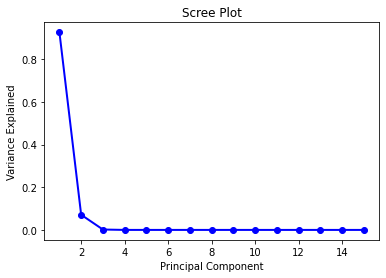

In [10]:
PC_values = np.arange(pca_1.n_components_) + 1
plt.plot(PC_values, pca_1.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

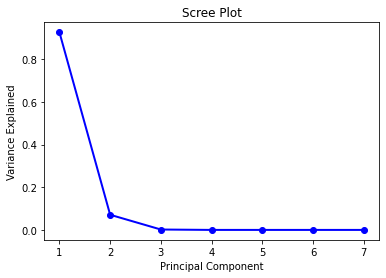

In [11]:
PC_values = np.arange(pca_2.n_components_) + 1
plt.plot(PC_values, pca_2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

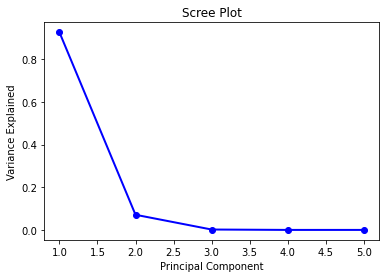

In [12]:
PC_values = np.arange(pca_3.n_components_) + 1
plt.plot(PC_values, pca_3.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [15]:
labels=df.columns.tolist()

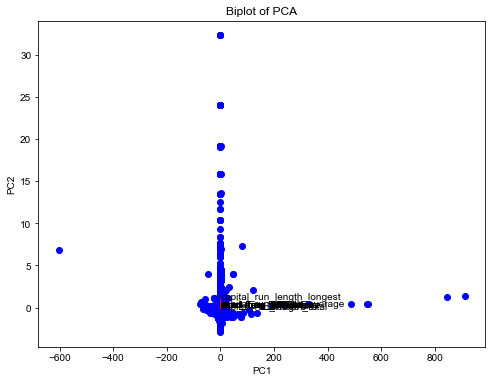

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df_1[2],pca_df_1[3],color='blue')
m=np.transpose(pca_1.components_)
n=np.transpose(pca_1.components_).shape[0]
for i in range(n):
    plt.arrow(0,0,m[i,0],m[i,1],color='red')
    plt.text(m[i,0],m[i,1],labels[i],color='black')
plt.xlabel('PC{}'.format(1))
plt.ylabel('PC{}'.format(2))
plt.title('Biplot of PCA')
sns.set_style('dark')
plt.show()
